In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install required packages
!pip install pandas matplotlib statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Predictive Analytics/AirPassengers.csv', index_col='Month', parse_dates=True)


In [ ]:
# Display the first few rows
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


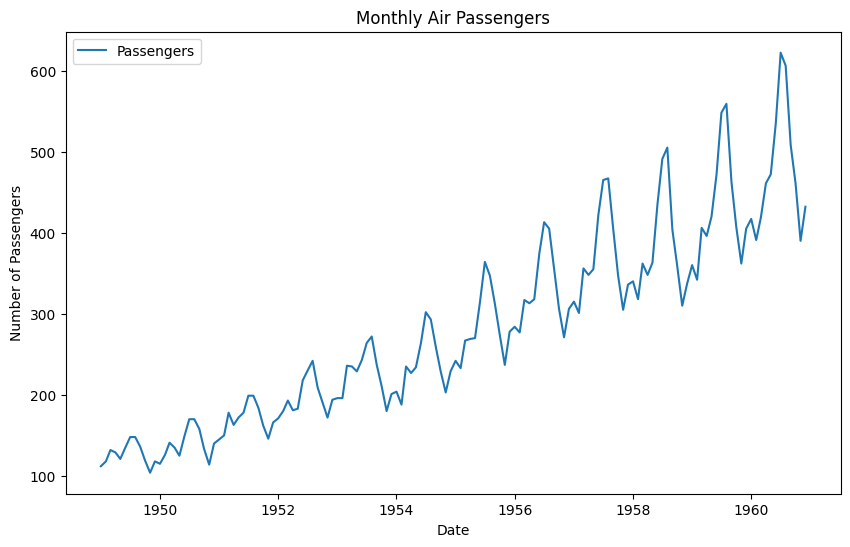

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data, label='Passengers')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
# Perform ADF test
result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [ ]:
# Differencing the time series to make it stationary
data_diff = data['#Passengers'].diff().dropna()

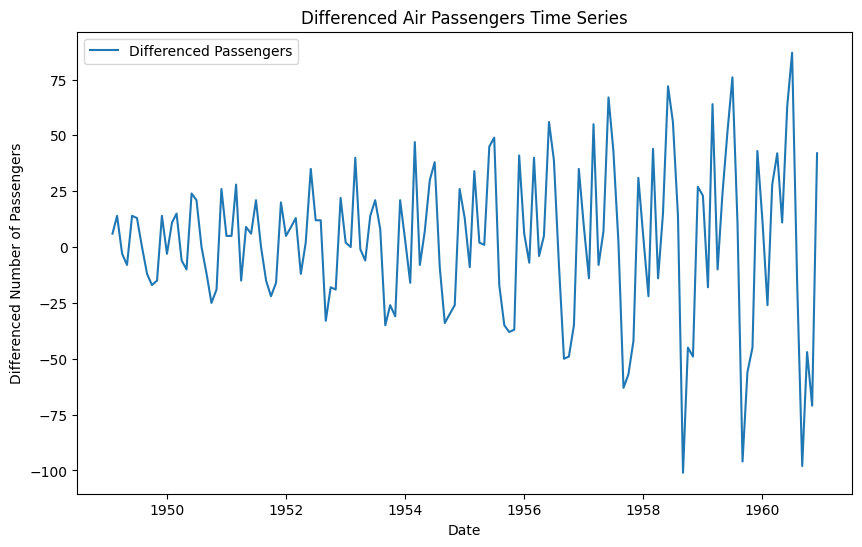

In [ ]:
# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Passengers')
plt.title('Differenced Air Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Number of Passengers')
plt.legend()
plt.show()

In [ ]:
# Perform ADF test on the differenced data
result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

ADF Statistic (Differenced): -2.8292668241700047
p-value (Differenced): 0.05421329028382478
Critical Values (Differenced): {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [ ]:
# Apply additional differencing if necessary
data_diff2 = data_diff.diff().dropna()

In [ ]:
# Perform ADF test on the twice-differenced data
result_diff2 = adfuller(data_diff2)
print('ADF Statistic (Twice Differenced):', result_diff2[0])
print('p-value (Twice Differenced):', result_diff2[1])
print('Critical Values (Twice Differenced):', result_diff2[4])

ADF Statistic (Twice Differenced): -16.384231542468513
p-value (Twice Differenced): 2.7328918500142026e-29
Critical Values (Twice Differenced): {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


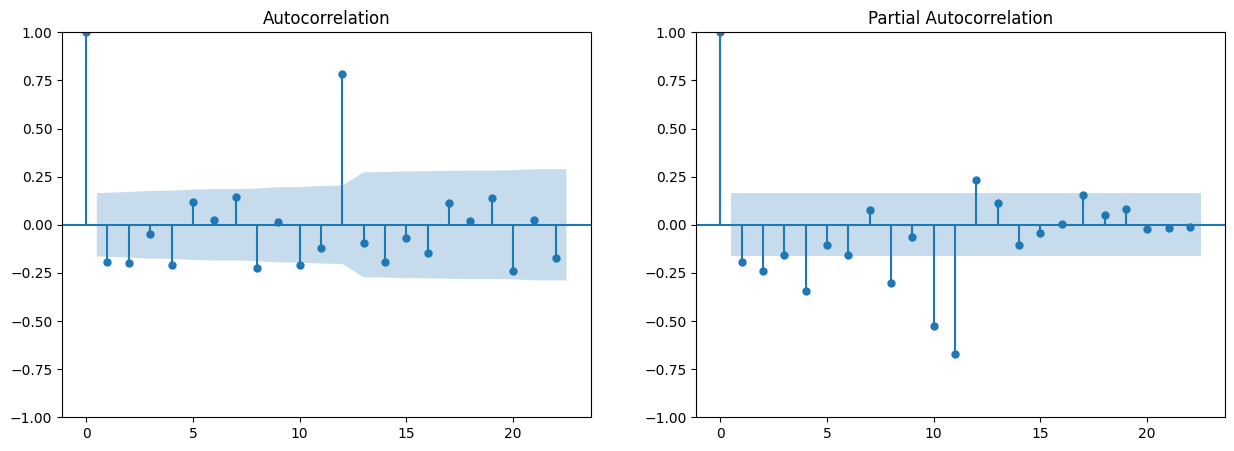

In [ ]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(data_diff2, ax=axes[0])
plot_pacf(data_diff2, ax=axes[1])
plt.show()

In [ ]:

# Fit the ARIMA model
model = ARIMA(data, order=(2, 2, 1))  # Adjust these values based on ACF/PACF plots
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -692.943
Date:                Fri, 30 Aug 2024   AIC                           1393.887
Time:                        10:09:05   BIC                           1405.710
Sample:                    01-01-1949   HQIC                          1398.691
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3845      0.092      4.194      0.000       0.205       0.564
ar.L2         -0.2259      0.071     -3.181      0.001      -0.365      -0.087
ma.L1         -0.9987      0.676     -1.478      0.1

In [ ]:
# Fit the ARIMA model
model = ARIMA(data, order=(1, 2, 1))  # Adjust these values based on ACF/PACF plots
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -696.464
Date:                Fri, 30 Aug 2024   AIC                           1398.928
Time:                        10:18:57   BIC                           1407.796
Sample:                    01-01-1949   HQIC                          1402.532
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.100      3.127      0.002       0.117       0.509
ma.L1         -0.9998      5.894     -0.170      0.865     -12.551      10.552
sigma2      1034.0009   6133.239      0.169      0.8

In [ ]:
# Apply additional differencing if necessary
data_diff3 = data_diff.diff().dropna()

In [ ]:
# Perform ADF test on the twice-differenced data
result_diff3 = adfuller(data_diff3)
print('ADF Statistic (Twice Differenced):', result_diff3[0])
print('p-value (Twice Differenced):', result_diff3[1])
print('Critical Values (Twice Differenced):', result_diff3[4])

ADF Statistic (Twice Differenced): -16.384231542468513
p-value (Twice Differenced): 2.7328918500142026e-29
Critical Values (Twice Differenced): {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


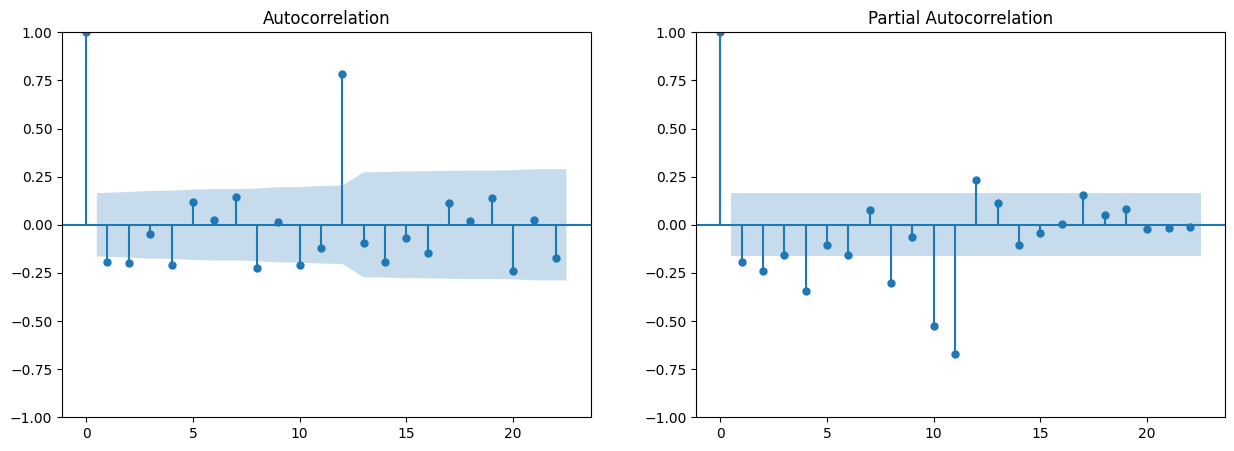

In [ ]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(data_diff3, ax=axes[0])
plot_pacf(data_diff3, ax=axes[1])
plt.show()

In [ ]:
# Fit the ARIMA model
model = ARIMA(data, order=(1, 3, 1))  # Adjust these values based on ACF/PACF plots
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 3, 1)   Log Likelihood                -719.581
Date:                Fri, 30 Aug 2024   AIC                           1445.162
Time:                        10:22:10   BIC                           1454.009
Sample:                    01-01-1949   HQIC                          1448.757
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1952      0.112     -1.740      0.082      -0.415       0.025
ma.L1         -0.9999     17.156     -0.058      0.954     -34.626      32.626
sigma2      1527.3713   2.62e+04      0.058      0.9